# Deep Learning - Anees Ahmad - 2021/03/27

# 5 Fundamentals of machine learning

## 5.4 Improving generalization

### 5.4.1 Dataset curation
-  generalization in deep learning originates from the latent structure of your data
  - if for data it is possible to interpolate between samples, model can be trained generalizes. 
  - If overly noisy or fundamentally discrete deep learning will not help
- dataset
  - Make sure you have enough data. Remember that you need a dense sampling of the input-cross-output space. More data will yield a better model. Sometimes, problems that seem impossible at first become solvable with a larger dataset.
  - Minimize labeling errors—visualize your inputs to check for anomalies, and proofread your labels.
  - Clean your data and deal with missing values
  - If you have many features and you aren’t sure which ones are actually useful, do feature selection.



### 5.4.2 Feature engineering

- process of using your own knowledge about the data and about the machine learning algorithm at hand to make the algorithm work better by applying hardcoded transformations to the data before it goes into the model
- new algorithms don't need feature engineering but can be used for two cases
  - Good features still allow you to solve problems more elegantly while using fewer resources
  - Good features let you solve a problem with far less data. The ability of deep learning models to learn features on their own relies on having lots of training data available


### 5.4.3 Using early stopping
- always interrupt training long before you’ve reached the minimum possible training loss
  - save model at the end of each epoch, and once best epoch is found, reuse the closest saved model. 
  - do this with an EarlyStopping callback, which will interrupt training as soon as validation metrics have stopped improving, while remembering the best known model state. 

### 5.4.4 Regularizing your model

- process of fighting overfitting
- guided by an accurate evaluation procedure

#### REDUCING THE NETWORK’S SIZE
  - model that is too small will not overfit
  - to mitigate overfitting reduce the size of the model
  - limited memorization resources won’t memorize training data

In [1]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow import keras 
from tensorflow.keras import layers

# Listing 5.10 Original model
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)
 
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

train_data = vectorize_sequences(train_data)
 
model = keras.Sequential([
  layers.Dense(16, activation="relu"),
  layers.Dense(16, activation="relu"),
  layers.Dense(1, activation="sigmoid")
])

model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"])

history_original = model.fit(
    train_data,
    train_labels,
    epochs=20, 
    batch_size=512, 
    validation_split=0.4)

17473536/17464789 [==============================] - 0s 0us/step
Epoch 1/20
30/30 [==============================] - 5s 41ms/step - loss: 0.5026 - accuracy: 0.7838 - val_loss: 0.3725 - val_accuracy: 0.8753
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2970 - accuracy: 0.9055 - val_loss: 0.2982 - val_accuracy: 0.8889
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2179 - accuracy: 0.9304 - val_loss: 0.3008 - val_accuracy: 0.8758
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1753 - accuracy: 0.9443 - val_loss: 0.2868 - val_accuracy: 0.8841
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1426 - accuracy: 0.9542 - val_loss: 0.2849 - val_accuracy: 0.8872
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1188 - accuracy: 0.9619 - val_loss: 0.2952 - val_accuracy: 0.8856
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0994 - accurac

In [2]:
# Listing 5.11 Version of the model with lower capacity
model = keras.Sequential([
  layers.Dense(4, activation="relu"),
  layers.Dense(4, activation="relu"),
  layers.Dense(1, activation="sigmoid")
])

model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"])

history_smaller_model = model.fit(
  train_data,
  train_labels,
  epochs=20,
  batch_size=512, 
  validation_split=0.4)


Epoch 1/20
30/30 [==============================] - 2s 33ms/step - loss: 0.6327 - accuracy: 0.6383 - val_loss: 0.5897 - val_accuracy: 0.7182
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.5535 - accuracy: 0.7622 - val_loss: 0.5465 - val_accuracy: 0.8126
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.5071 - accuracy: 0.8269 - val_loss: 0.5163 - val_accuracy: 0.8030
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.4725 - accuracy: 0.8633 - val_loss: 0.4998 - val_accuracy: 0.8056
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.4453 - accuracy: 0.8861 - val_loss: 0.4792 - val_accuracy: 0.8514
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.4223 - accuracy: 0.9062 - val_loss: 0.4677 - val_accuracy: 0.8634
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.4018 - accuracy: 0.9197 - val_loss: 0.4642 - val_accuracy: 0.8553
Epoch 8/20
30

In [3]:
# Listing 5.12 Version of the model with higher capacity
model = keras.Sequential([
  layers.Dense(512, activation="relu"),
  layers.Dense(512, activation="relu"),
  layers.Dense(1, activation="sigmoid")
])
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"])
history_larger_model = model.fit(
  train_data,
  train_labels,
  epochs=20, 
  batch_size=512, 
  validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 39ms/step - loss: 0.5554 - accuracy: 0.7523 - val_loss: 0.3069 - val_accuracy: 0.8812
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2599 - accuracy: 0.8987 - val_loss: 0.3314 - val_accuracy: 0.8562
Epoch 3/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1511 - accuracy: 0.9427 - val_loss: 0.3402 - val_accuracy: 0.8775
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0698 - accuracy: 0.9769 - val_loss: 0.4085 - val_accuracy: 0.8809
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0997 - accuracy: 0.9746 - val_loss: 0.3592 - val_accuracy: 0.8900
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0047 - accuracy: 0.9995 - val_loss: 0.4930 - val_accuracy: 0.8883
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 8.5650e-04 - accuracy: 0.9999 - val_loss: 0.6339 - val_accuracy: 0.8865
Epoch 8/2

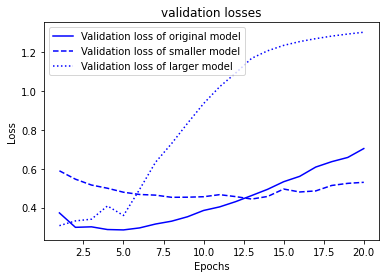

In [4]:
# plot
import matplotlib.pyplot as plt
val_loss_original = history_original.history["val_loss"]
val_loss_smaller_model = history_smaller_model.history["val_loss"]
val_loss_larger_model = history_larger_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss_original, "b-",
 label="Validation loss of original model")
plt.plot(epochs, val_loss_smaller_model, "b--",
 label="Validation loss of smaller model")
plt.plot(epochs, val_loss_larger_model, "b:",label="Validation loss of larger model")
plt.title("validation losses")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()


- smaller model starts overfitting later than the reference model its performance degrades more slowly once it starts overfitting.
- bigger model starts overfitting almost immediately overfits much more severely.
- The more capacity the model has, the more quickly it can model the training data (resulting in a low training loss), but the more susceptible it is to overfitting (resulting in a large difference between the training and validation loss).


#### ADDING WEIGHT REGULARIZATION

-  Simpler models are less likely to overfit than complex ones.
- A simple model 
  - a model where the distribution of parameter values has less entropy
- weight regularization
  - put constraints on the complexity of a model which makes the distribution of weight values more regular.
  - it’s done by adding to the loss function of the model a cost associated with having large weights
- Cost
  - L1 regularization
    - The cost added is proportional to the absolute value of the weight coefficients
  - L2 regularization
    - The cost added is proportional to the square of the value of the weight coefficients
    - L2 regularization is also called weight decay in the context of neural networks.

In [5]:
# Listing 5.13 Adding L2 weight regularization to the model
from tensorflow.keras import regularizers
model = keras.Sequential([
  layers.Dense(16,kernel_regularizer=regularizers.l2(0.002),activation="relu"),
  layers.Dense(16,kernel_regularizer=regularizers.l2(0.002),activation="relu"),
  layers.Dense(1, activation="sigmoid")
])
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data,
    train_labels,
    epochs=20,
    batch_size=512,
    validation_split=0.4)


Epoch 1/20
30/30 [==============================] - 2s 49ms/step - loss: 0.6166 - accuracy: 0.7675 - val_loss: 0.5097 - val_accuracy: 0.8508
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.4204 - accuracy: 0.8925 - val_loss: 0.4031 - val_accuracy: 0.8830
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3464 - accuracy: 0.9115 - val_loss: 0.3792 - val_accuracy: 0.8804
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3058 - accuracy: 0.9235 - val_loss: 0.3608 - val_accuracy: 0.8895
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2844 - accuracy: 0.9327 - val_loss: 0.3825 - val_accuracy: 0.8756
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2730 - accuracy: 0.9349 - val_loss: 0.3653 - val_accuracy: 0.8846
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2616 - accuracy: 0.9400 - val_loss: 0.3776 - val_accuracy: 0.8802
Epoch 8/20
30

-  loss for this model will be much higher at training than at test time

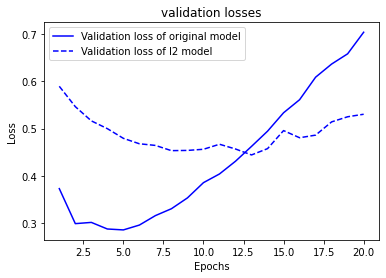

In [6]:
# plot
import matplotlib.pyplot as plt
val_loss_original = history_original.history["val_loss"]
val_loss_l2_model = history_l2_reg.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss_original, "b-",
 label="Validation loss of original model")
plt.plot(epochs, val_loss_smaller_model, "b--",
 label="Validation loss of l2 model")
plt.title("validation losses")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

- small deep learning models
  - regularizers
- large deep learning models
  - dropout

#### ADDING DROPOUT
- dropping out a number of output features of the layer during training
-  The dropout rate is the fraction of the features that are zeroed out

In [7]:
# Listing 5.15 Adding dropout to the IMDB model
model = keras.Sequential([
  layers.Dense(16, activation="relu"),layers.Dropout(0.5),
  layers.Dense(16, activation="relu"),layers.Dropout(0.5),
  layers.Dense(1, activation="sigmoid")
])
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"])
history_dropout = model.fit(
  train_data,
  train_labels,
  epochs=20, 
  batch_size=512, 
  validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 36ms/step - loss: 0.6313 - accuracy: 0.6331 - val_loss: 0.5195 - val_accuracy: 0.8392
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.5129 - accuracy: 0.7735 - val_loss: 0.4003 - val_accuracy: 0.8732
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.4288 - accuracy: 0.8267 - val_loss: 0.3383 - val_accuracy: 0.8852
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3565 - accuracy: 0.8667 - val_loss: 0.2981 - val_accuracy: 0.8891
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3102 - accuracy: 0.8913 - val_loss: 0.2794 - val_accuracy: 0.8904
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2685 - accuracy: 0.9091 - val_loss: 0.2728 - val_accuracy: 0.8910
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2295 - accuracy: 0.9248 - val_loss: 0.2767 - val_accuracy: 0.8924
Epoch 8/20
30

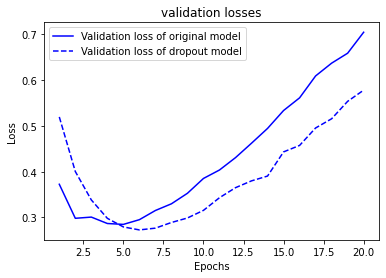

In [8]:
# plot
import matplotlib.pyplot as plt
val_loss_original = history_original.history["val_loss"]
val_loss_dropout_model = history_dropout.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss_original, "b-",
 label="Validation loss of original model")
plt.plot(epochs, val_loss_dropout_model, "b--",
 label="Validation loss of dropout model")
plt.title("validation losses")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

- maximize generalization and prevent overfitting
  - Get more training data, or better training data.
  - Develop better features.
  - Reduce the capacity of the model.
  - Add weight regularization (for smaller models).
  - Add dropout.

## Summary
- The purpose of a machine learning model is to generalize: to perform accurately on never-before-seen inputs. It’s harder than it seems.
- A deep neural network achieves generalization by learning a parametric model that can successfully interpolate between training samples—such a model can be said to have learned the “latent manifold” of the training data. This is why deep learning models can only make sense of inputs that are very close to what they’ve seen during training.
- The fundamental problem in machine learning is the tension between optimization and generalization: to attain generalization, you must first achieve a good fit to the training data, but improving your model’s fit to the training data will inevitably start hurting generalization after a while. Every single deep learning best practice deals with managing this tension. 
- The ability of deep learning models to generalize comes from the fact that they manage to learn to approximate the latent manifold of their data, and can thus make sense of new inputs via interpolation.
- It’s essential to be able to accurately evaluate the generalization power of your model while you’re developing it. You have at your disposal an array of evaluation methods, from simple holdout validation to K-fold cross-validation and iterated K-fold cross-validation with shuffling. Remember to always keep a completely separate test set for final model evaluation, since information leaks from your validation data to your model may have occurred.
- When you start working on a model, your goal is first to achieve a model that has some generalization power and that can overfit. Best practices for doing this include tuning your learning rate and batch size, leveraging better architecture priors, increasing model capacity, or simply training longer.
- As your model starts overfitting, your goal switches to improving generalization through model regularization. You can reduce your model’s capacity add dropout or weight regularization, and use early stopping. And naturally, a larger or better dataset is always the number one way to help a model generalize.